# modulos

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
import os
from datetime import datetime, date, timedelta

import matplotlib.pyplot as plt
import dateutil.parser as parser

# rutas

In [2]:
# Validado
# Ruta = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\S1.val\All-S1-VAL.txt"
# Glosados
Ruta = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\S3\All-S3.txt"

# Cargue Datafrmes

In [3]:
df_S1 = pd.read_csv(Ruta, sep=',', dtype=str, encoding='latin-1')
# Convertir Fecha_Proceso a datetime y filtrar desde enero 2023
df_S1['Fecha_Proceso'] = pd.to_datetime(df_S1['Fecha_Proceso'], format='%d/%m/%Y')
df_S1 = df_S1[df_S1['Fecha_Proceso'] >= '2022-01-01']

# Limpieza

In [4]:
# Crear nueva columna para categorizar tipo de proceso
df_S1['Categoria_Proceso'] = df_S1['TIPO_TRASLADO'].astype(int).apply(
    lambda x: 'Movilidades' if x in [3, 4, 5] else 'Traslados'
)

# Graficas

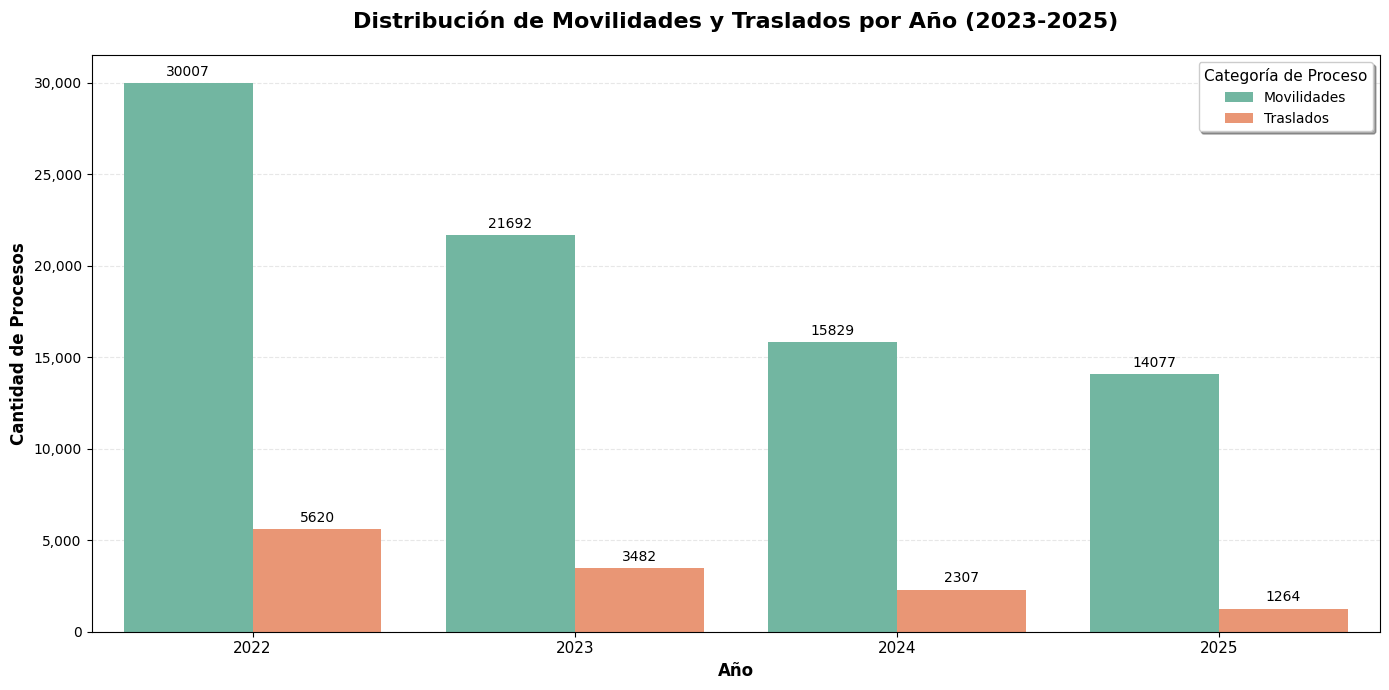


📊 Resumen por año y categoría:
Categoria_Proceso  Movilidades  Traslados
Año                                      
2022                     30007       5620
2023                     21692       3482
2024                     15829       2307
2025                     14077       1264

📈 Total de procesos: 94,278


In [5]:
# Extraer el año de Fecha_Proceso
df_S1['Año'] = df_S1['Fecha_Proceso'].dt.year

# Crear el gráfico de conteo por año y categoría
fig, ax = plt.subplots(figsize=(14, 7))

# Usar barplot en lugar de countplot para mejor control
conteo = df_S1.groupby(['Año', 'Categoria_Proceso']).size().reset_index(name='Cantidad')

# Crear gráfico de barras agrupadas
sns.barplot(data=conteo, x='Año', y='Cantidad', hue='Categoria_Proceso', 
            palette=['#66c2a5', '#fc8d62'], ax=ax)

# Mejorar títulos y etiquetas
plt.title('Distribución de Movilidades y Traslados por Año (2023-2025)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Año', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de Procesos', fontsize=12, fontweight='bold')

# Mejorar la leyenda
plt.legend(title='Categoría de Proceso', title_fontsize=11, fontsize=10, 
           loc='upper right', frameon=True, shadow=True)

# Añadir valores en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

# Mejorar el grid
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Formato de los ticks
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=10)

# Añadir formato de miles en el eje Y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

# Opcional: Mostrar estadísticas
print("\n📊 Resumen por año y categoría:")
print(conteo.pivot(index='Año', columns='Categoria_Proceso', values='Cantidad'))
print(f"\n📈 Total de procesos: {len(df_S1):,}")

C:\Users\crist\AppData\Local\Temp\ipykernel_22832\1511788060.py:107: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\crist\Documents\Proyectos Python\capresoca-data-automation\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


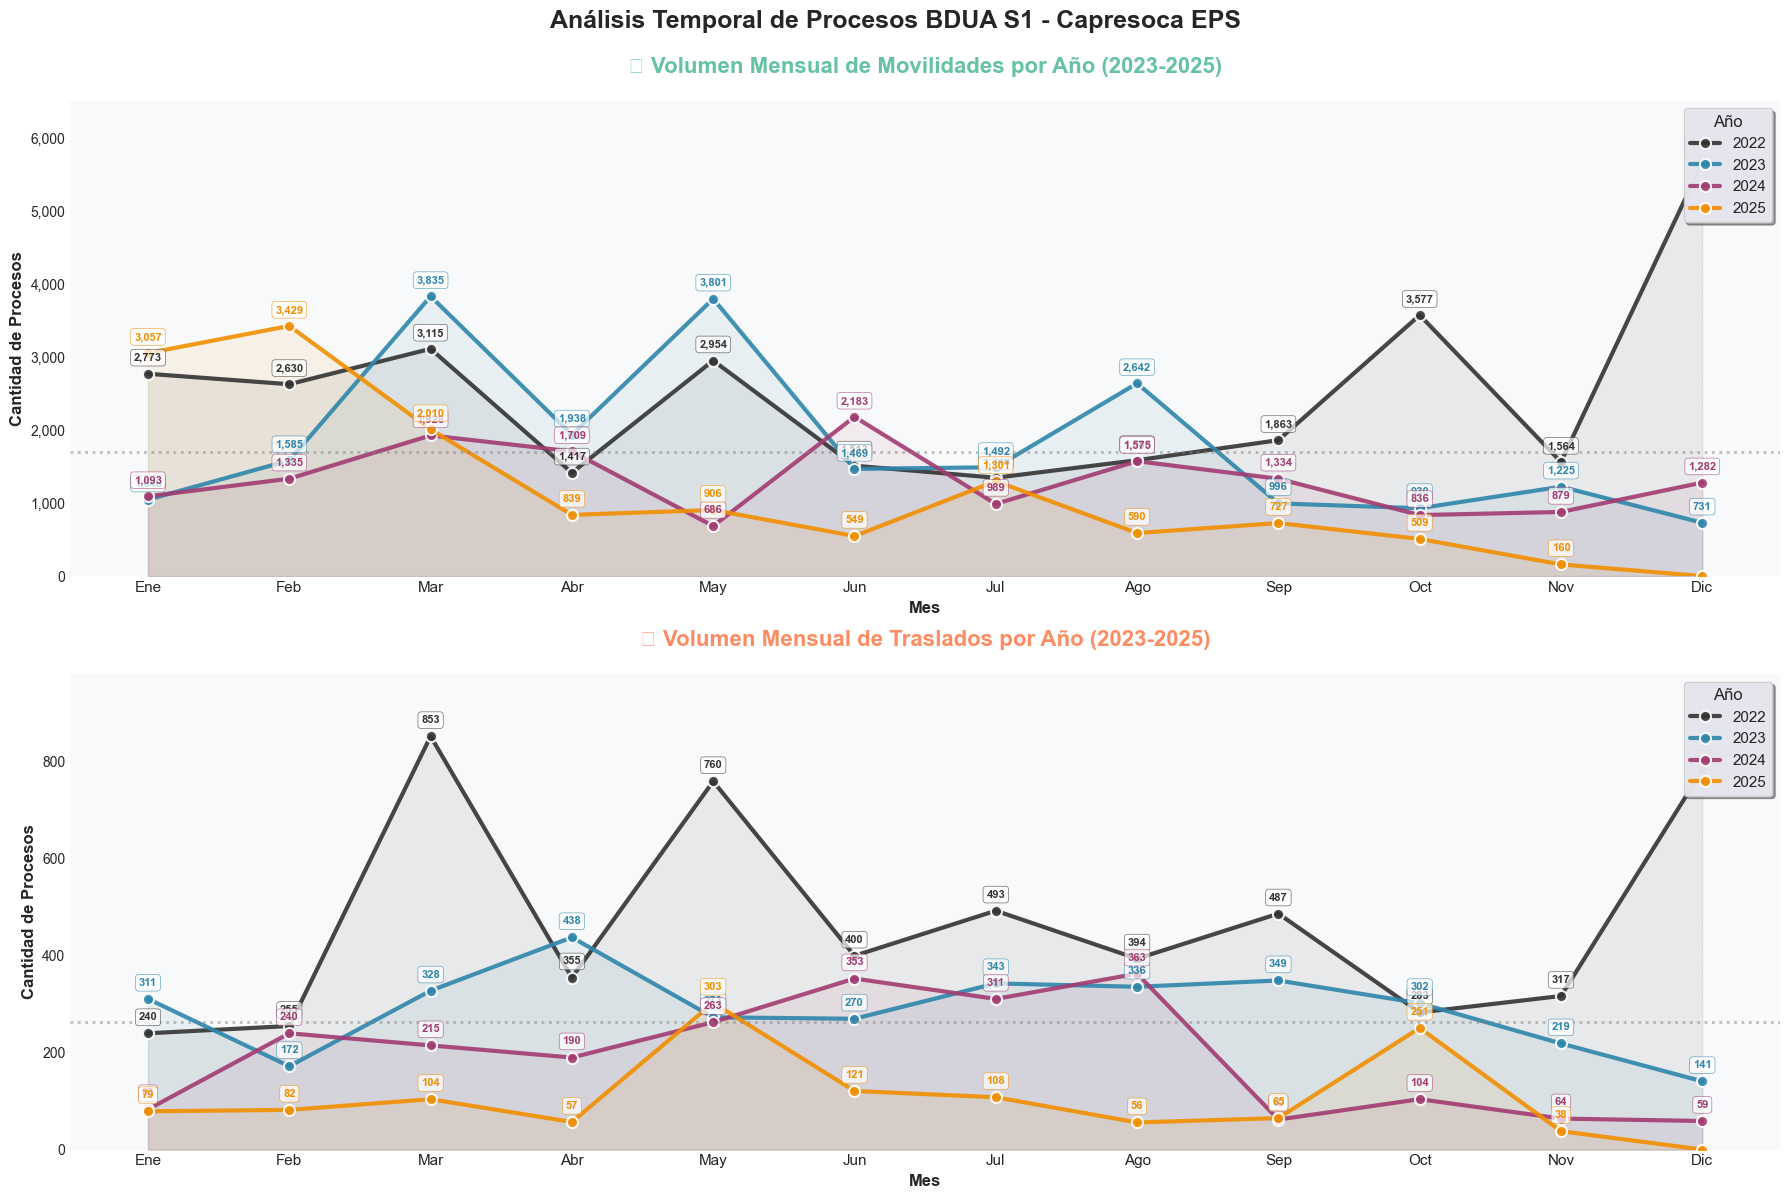


📊 RESUMEN ESTADÍSTICO MENSUAL POR CATEGORÍA Y AÑO

🔹 MOVILIDADES
------------------------------------------------------------
Año    2022    2023    2024    2025
Mes                                
1    2773.0  1048.0  1093.0  3057.0
2    2630.0  1585.0  1335.0  3429.0
3    3115.0  3835.0  1928.0  2010.0
4    1417.0  1938.0  1709.0   839.0
5    2954.0  3801.0   686.0   906.0
6    1513.0  1469.0  2183.0   549.0
7    1348.0  1492.0   989.0  1301.0
8    1588.0  2642.0  1575.0   590.0
9    1863.0   996.0  1334.0   727.0
10   3577.0   930.0   836.0   509.0
11   1564.0  1225.0   879.0   160.0
12   5665.0   731.0  1282.0     0.0

   Total Movilidades: 81,605
   Promedio mensual: 1,700
   Máximo: 5,665
   Mínimo: 0

🔹 TRASLADOS
------------------------------------------------------------
Año   2022   2023   2024   2025
Mes                            
1    240.0  311.0   83.0   79.0
2    255.0  172.0  240.0   82.0
3    853.0  328.0  215.0  104.0
4    355.0  438.0  190.0   57.0
5    760.0  273.

In [6]:
# Extraer año y mes
df_S1['Año'] = df_S1['Fecha_Proceso'].dt.year
df_S1['Mes'] = df_S1['Fecha_Proceso'].dt.month

# Configurar estilo de matplotlib
plt.style.use('seaborn-v0_8-darkgrid')

# Crear subplots para cada categoría
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

categorias = ['Movilidades', 'Traslados']
# Paleta de colores profesional para cada año
colores_años = {
    2023: '#2E86AB',  # Azul profundo
    2024: '#A23B72',  # Rosa/Magenta
    2025: '#F18F01'   # Naranja cálido
}

for idx, categoria in enumerate(categorias):
    # Filtrar por categoría
    df_cat = df_S1[df_S1['Categoria_Proceso'] == categoria]
    
    # Agrupar por año y mes
    conteo_mensual = df_cat.groupby(['Año', 'Mes']).size().reset_index(name='Cantidad')
    
    # Crear pivote
    pivot = conteo_mensual.pivot(index='Mes', columns='Año', values='Cantidad').fillna(0)
    
    # Gráfico de líneas con mejoras
    for año in pivot.columns:
        line = axes[idx].plot(pivot.index, pivot[año], 
                      marker='o', 
                      linewidth=3, 
                      markersize=8, 
                      label=str(año), 
                      color=colores_años.get(año, '#333333'),
                      markeredgecolor='white',
                      markeredgewidth=1.5,
                      alpha=0.9)
        
        # Añadir etiquetas de valores en cada punto
        for x, y in zip(pivot.index, pivot[año]):
            if y > 0:  # Solo mostrar si hay datos
                axes[idx].annotate(f'{int(y):,}', 
                                 xy=(x, y),
                                 xytext=(0, 8),  # Desplazamiento vertical
                                 textcoords='offset points',
                                 ha='center',
                                 va='bottom',
                                 fontsize=8,
                                 fontweight='bold',
                                 color=colores_años.get(año, '#333333'),
                                 bbox=dict(boxstyle='round,pad=0.3', 
                                         facecolor='white', 
                                         edgecolor=colores_años.get(año, '#333333'),
                                         alpha=0.7,
                                         linewidth=0.5))
    
    # Rellenar área bajo las líneas (opcional)
    for año in pivot.columns:
        axes[idx].fill_between(pivot.index, pivot[año], alpha=0.08, 
                              color=colores_años.get(año, '#333333'))
    
    # Personalización del título con color de categoría
    color_titulo = '#66c2a5' if categoria == 'Movilidades' else '#fc8d62'
    axes[idx].set_title(f'📊 Volumen Mensual de {categoria} por Año (2023-2025)', 
                       fontsize=16, fontweight='bold', pad=20, color=color_titulo)
    
    axes[idx].set_xlabel('Mes', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Cantidad de Procesos', fontsize=12, fontweight='bold')
    
    # Leyenda mejorada
    legend = axes[idx].legend(title='Año', loc='upper right', 
                             frameon=True, shadow=True, fancybox=True,
                             fontsize=11, title_fontsize=12)
    legend.get_frame().set_alpha(0.95)
    
    # Grid más visible
    axes[idx].grid(True, linestyle='--', alpha=0.4, linewidth=0.8)
    axes[idx].set_axisbelow(True)
    
    # Etiquetas de meses en español
    meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
             'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    axes[idx].set_xticks(range(1, 13))
    axes[idx].set_xticklabels(meses, fontsize=11, fontweight='500')
    
    # Formato de miles con separador
    axes[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Añadir línea horizontal con el promedio
    promedio = pivot.mean().mean()
    axes[idx].axhline(y=promedio, color='gray', linestyle=':', 
                     linewidth=2, alpha=0.5)
    
    # Ajustar límites del eje Y para mejor visualización (más espacio para etiquetas)
    y_max = pivot.max().max()
    axes[idx].set_ylim(0, y_max * 1.15)
    
    # Fondo con color suave
    axes[idx].set_facecolor('#f8f9fa')

# Título general
fig.suptitle('Análisis Temporal de Procesos BDUA S1 - Capresoca EPS', 
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

# Estadísticas mejoradas
print("\n" + "="*80)
print("📊 RESUMEN ESTADÍSTICO MENSUAL POR CATEGORÍA Y AÑO")
print("="*80)

for categoria in categorias:
    df_cat = df_S1[df_S1['Categoria_Proceso'] == categoria]
    resumen = df_cat.groupby(['Año', 'Mes']).size().reset_index(name='Cantidad')
    pivot = resumen.pivot(index='Mes', columns='Año', values='Cantidad').fillna(0)
    
    print(f"\n🔹 {categoria.upper()}")
    print("-" * 60)
    print(pivot.to_string())
    print(f"\n   Total {categoria}: {pivot.sum().sum():,.0f}")
    print(f"   Promedio mensual: {pivot.mean().mean():,.0f}")
    print(f"   Máximo: {pivot.max().max():,.0f}")
    print(f"   Mínimo: {pivot.min().min():,.0f}")

print("\n" + "="*80)

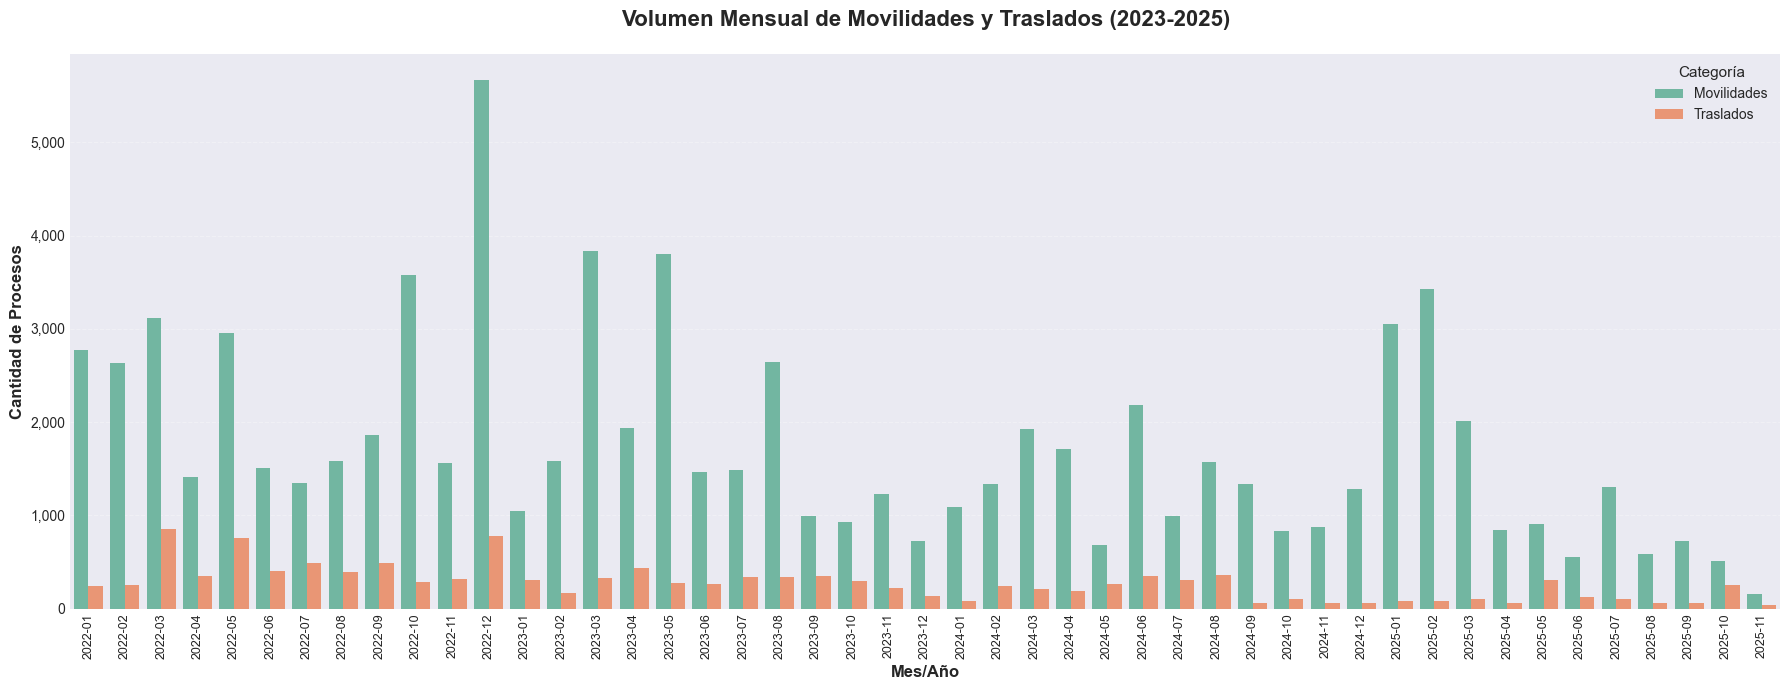

In [7]:
# Versión alternativa: Barras agrupadas por mes
df_S1['Año_Mes'] = df_S1['Fecha_Proceso'].dt.to_period('M').astype(str)
df_S1['Mes_Año'] = df_S1['Fecha_Proceso'].dt.strftime('%Y-%m')

# Crear gráfico
fig, ax = plt.subplots(figsize=(18, 7))

# Agrupar datos
conteo = df_S1.groupby(['Mes_Año', 'Categoria_Proceso']).size().reset_index(name='Cantidad')

# Gráfico de barras
sns.barplot(data=conteo, x='Mes_Año', y='Cantidad', hue='Categoria_Proceso',
            palette=['#66c2a5', '#fc8d62'], ax=ax)

# Personalización
plt.title('Volumen Mensual de Movilidades y Traslados (2023-2025)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mes/Año', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de Procesos', fontsize=12, fontweight='bold')
plt.legend(title='Categoría', title_fontsize=11, fontsize=10, loc='upper right')
plt.xticks(rotation=90, fontsize=9)
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

In [8]:
print(df_S1.columns)

Index(['Nombre_Archivo', 'ENT_ID', 'TPS_IDN_ID',
       'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO',
       'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE',
       'AFL_FECHA_NACIMIENTO', 'TPS_GNR_ID', 'TPS_IDN_ID_2',
       'HST_IDN_NUMERO_IDENTIFICACION_2', 'AFL_PRIMER_APELLIDO_2',
       'AFL_SEGUNDO_APELLIDO_2', 'AFL_PRIMER_NOMBRE_2', 'AFL_SEGUNDO_NOMBRE_2',
       'AFL_FECHA_NACIMIENTO_2', 'TPS_GNR_ID_2', 'MNC_ID', 'ZNS_ID',
       'FECHA_AFILIACION_MOVILIDAD', 'TPS_GRP_PBL_ID', 'TPS_NVL_SSB_ID',
       'TIPO_TRASLADO', 'CND_AFL_SBS_METODOLOGIA', 'CND_AFL_SBS_SUBGRUPO_SIV',
       'CON_DISCAPACIDAD', 'TPS_IDN_CF_ID', 'HST_IDN_NUMERO_CF_IDENTIFICACION',
       'TPS_PRN_ID', 'TPS_AFL_ID', 'TPS_MDL_SBS_ID', 'ENT_ID_ORIGEN', 'GLOSA',
       'Fecha_Proceso', 'No_Glosas', 'Categoria_Proceso', 'Año', 'Mes',
       'Año_Mes', 'Mes_Año'],
      dtype='object')
